**Block 1: Import Libraries**

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

**Block 2: Creating Tita Function**

In [32]:

#def yes_or_no(): 
  #reply = str(input('Would you like a subplot (y/n): ')).lower().strip()
  #if reply[0] == 'y':
     #fpr, tpr, thresholds = metrics.roc_curve(ytest, tree_model.predict_proba(Xtest)[:,1]) 
     #fig,axes = plt.subplots(1,2)
     #sns.boxplot(y,X[X.columns[0]],ax=axes[0])
     #axes[1].plot(fpr,tpr)
      #axes[1].plot([0,1],[0,1])
    

def tita (X,y,plot=0): 
  if X.isnull().sum().sum()>0:
    X = X.fillna(X.median()) #replace any missing data with the median 
  
  Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,random_state=1)
  
  tree_model = tree.DecisionTreeClassifier(max_depth=2
                                           ) 
  tree_model = tree_model.fit(Xtrain, ytrain)
  tree.plot_tree(tree_model)

  tt=tree_model.score(Xtrain, ytrain)
  print('Traing score:',tt)
  tet=tree_model.score(Xtest, ytest)
  print('Testing score',tet)
  dif=tt-tet
  print('The difference between the training and testing model score is: ' + str(dif)) #show the difference in model score to see if it is overfitting

  reply = str(input('Would you like a subplot (y/n): ')).lower().strip()
  if reply[0] == 'y':
    fpr, tpr, thresholds = metrics.roc_curve(ytest, tree_model.predict_proba(Xtest)[:,1]) 
    fig,axes = plt.subplots(1,2)
    sns.boxplot(y,X[X.columns[0]],ax=axes[0])
    axes[1].plot(fpr,tpr)
    axes[1].plot([0,1],[0,1])


**Block 3: Load and work with dataset**

In [6]:
data=sns.load_dataset('titanic')

**Block 4: Correlation between fare and survival rate**

Traing score: 0.688622754491018
Testing score 0.6278026905829597
The difference between the training and testing model score is: 0.060820063908058275
Would you like a subplot (y/n): y


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


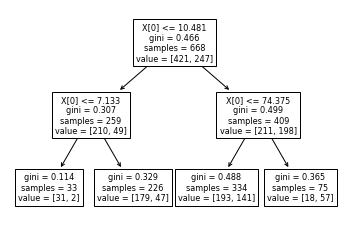

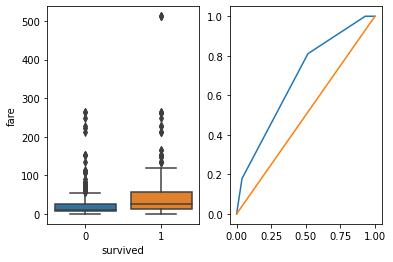

In [33]:
tita(data[['fare']],data['survived'],plot=1)

**Block 5: Correlation between class and survival rate**

Traing score: 0.6826347305389222
Testing score 0.6681614349775785
The difference between the training and testing model score is: 0.014473295561343691
Would you like a subplot (y/n): y


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


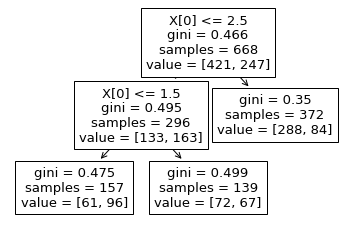

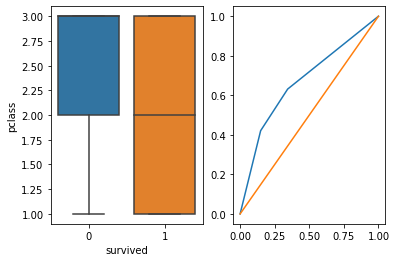

In [16]:
tita(data[['pclass']],data['survived'],plot=1)

**After looking at the Pclass correlation, it can clearly be seen that there is a higher prediction rate using Pclass. I would have Pat arrange her room and seating by Pclass for a higher chance at survival**

**EC: Age vs Sex**

In [23]:
def tita (X,y,plot=0): 
  if X.isnull().sum().sum()>0:
    X = X.fillna(X.median()) #replace any missing data with the median 
  
  X=pd.get_dummies(X,drop_first=True) #dummy code
  
  Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,random_state=1)
  
  tree_model = tree.DecisionTreeClassifier(max_depth=3) #switched to 3 to see detail in graph for age bracket and worked
  tree_model = tree_model.fit(Xtrain, ytrain)
  tree.plot_tree(tree_model)

  tt=tree_model.score(Xtrain, ytrain)
  print('Traing score:',tt)
  tet=tree_model.score(Xtest, ytest)
  print('Testing score',tet)
  dif=tt-tet
  print('The difference between the training and testing model score is: ' + str(dif)) #show the difference in model score to see if it is overfitting

  reply = str(input('Would you like a subplot (y/n): ')).lower().strip() #ask for input to create subplots
  if reply[0] == 'y':
    fpr, tpr, thresholds = metrics.roc_curve(ytest, tree_model.predict_proba(Xtest)[:,1]) 
    fig,axes = plt.subplots(1,2)
    sns.boxplot(y,X[X.columns[0]],ax=axes[0])    
    axes[1].plot(fpr,tpr)
    axes[1].plot([0,1],[0,1])

**Block 6: Correlation between sex and survival rate**

Traing score: 0.7874251497005988
Testing score 0.7847533632286996
The difference between the training and testing model score is: 0.0026717864718992512
Would you like a subplot (y/n): y


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


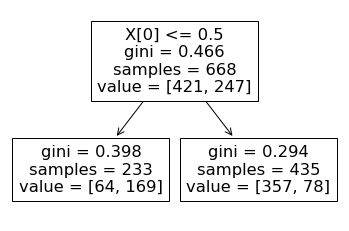

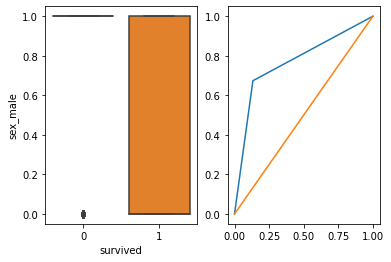

In [24]:
tita(data[['sex']],data['survived'],plot=1)

**Block 7: Correlation between age and survival rate**

Traing score: 0.6601796407185628
Testing score 0.5695067264573991
The difference between the training and testing model score is: 0.09067291426116375
Would you like a subplot (y/n): y


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


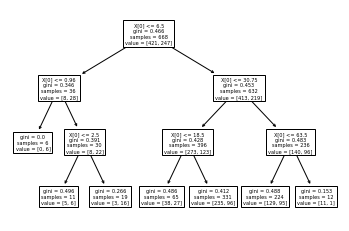

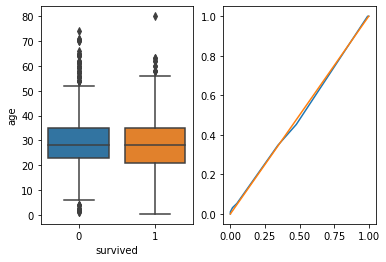

In [22]:
tita(data[['age']],data['survived'],plot=1)

**Sex of the passenger matters the most, not so much for age seems to be even all across**